# 05 Introduction to Pump Hydraulics using Fluids module
---

## Introduction 🌊

## What is Fluids?
[![Fluids](https://img.shields.io/badge/Fluids-8CAAE6?style=flat&logo=Fluids&logoColor=black)](https://pypi.org/project/fluids/) is a free and open-source Python library used for scientific computing and technical computing.

Fluids is open-source software for engineers and technicians working in the fields of chemical, mechanical, or civil engineering. It includes modules for piping, fittings, pumps, tanks, compressible flow, open-channel flow, atmospheric properties, solar properties, particle size distributions, two phase flow, friction factors, control valves, orifice plates and other flow meters, ejectors, relief valves, and more.

The fluids library is designed to be a low-overhead, lightweight repository of engineering knowledge and utilities that relate to fluid dynamics.

Fluids was originally tightly integrated with SciPy and NumPy; today they are optional components used for only a small amount of functionality which do not have pure-Python numerical methods implemented. Fluids targets Python 2.7 and up as well as PyPy2 and PyPy3. Additionally, fluids has been tested by the author to load in IronPython, Jython, and micropython.

While the routines in Fluids are normally quite fast and as efficiently coded as possible, depending on the application there can still be a need for further speed. PyPy provides a substantial speed boost of 6-12 times for most methods. Fluids also supports Numba, a powerful accelerator that works well with NumPy. The Numba interface to fluids also makes it easy to multithread execution as well, avoiding Python GIL issue.

Fluids runs on all operating systems which support Python, is quick to install, and is free of charge. Fluids is designed to be easy to use while still providing powerful functionality. If you need to perform some fluid dynamics calculations, give fluids a try.

In [2]:
import fluids #Importing fluids 
import math #Importing mathematics 
import thermo #Importing thermodynamics for properties

## Problem 1

Given that a pump is located 30 feet above sea level, has a NPSHr of 20’ at a flow rate of 400 gpm, and is fed by a tank of 60 deg F water with a surface pressure of 5 psig and a liquid level 25’ below the suction of the pump.

The head losses in the suction pipeline are 6’.

Find the NPSH available and compare it to the NPSHr. A NPSHr margin ratio is required

In [3]:
from fluids.units import *
rho = 62.364*u.lb/u.ft**3
P_tank = 5*u.psi + 1*u.atm
Psat = 0.256*u.psi
H_tank = 5*u.foot
H_pipe = 30*u.foot
dH = H_pipe - H_tank

head_loss = 6*u.foot

NPSHa = ((P_tank-Psat)/rho/u.gravity) - dH - head_loss
(NPSHa).to(u.foot)

13.887316780096477 <Unit('foot')>

## Problem 2

Given that a pump is located 30-60 feet above sea level, has a NPSHr of 20’ at a flow rate of 400 gpm, and is fed by a tank of 60 deg F water with a surface pressure of 5 psig and a liquid level 25’ below the suction of the pump.

The head losses in the suction pipeline are 6’.

Find the NPSH available and compare it to the NPSHr. A NPSHr margin ratio is required

In [10]:
import numpy as np
from fluids.units import *
rho = 62.364*u.lb/u.ft**3
P_tank = 5*u.psi + 1*u.atm
Psat = 0.256*u.psi
H_tank = 5*u.foot
H_pipe = np.linspace(30*u.foot,60*u.foot,10)
dH = H_pipe - H_tank

head_loss = 6*u.foot

NPSHa = ((P_tank-Psat)/rho/u.gravity) - dH - head_loss
(NPSHa).to(u.foot)

Magnitude,[13.887316780096477 10.553983446763139 7.220650113429807 3.88731678009647 0.5539834467631332 -2.7793498865701998 -6.112683219903532 -9.446016553236873 -12.779349886570206 -16.112683219903538]
Units,foot


c:\Users\viraj\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_asarray.py:102: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


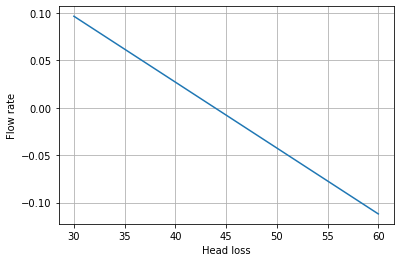

In [15]:
import matplotlib.pyplot as plt
plt.plot(H_pipe,NPSHa)
plt.grid()
plt.xlabel('Head loss')
plt.ylabel('Flow rate')
plt.show()